<a href="https://colab.research.google.com/github/Arvinth-s/Pattern-Recognition/blob/main/Perceptron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
#OM NAMO NARAYANA

In [222]:
import random
import numpy as np
import matplotlib.pyplot as plt

**Rotation matrix**<br>
We generate a rotation matrix that rotates the axis to theta ( +30 degrees)


In [223]:
theta = np.radians(30)
cos_term, sin_term = np.cos(theta), np.sin(theta)
R = np.array(((cos_term, -sin_term), (sin_term, cos_term)))
print(R)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


N : number of datapoints in each classes<br>
M : dimension of each datapoint (here we take as 2 so they can be represented in a plane)

In [224]:
N = 50
M = 2

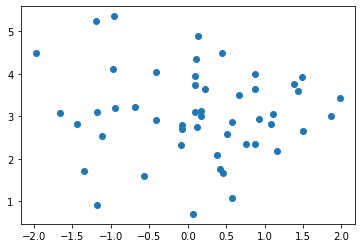

In [225]:
a = np.random.randn(N, M)
x = np.transpose(a)[0]
y = np.transpose(a)[1]
y = y - np.min(y) + 0.7
plt.scatter(x, y)
a = [x, y]

We generate random datapoints for class 1 and make the value of y greater than 0 for all datapoints

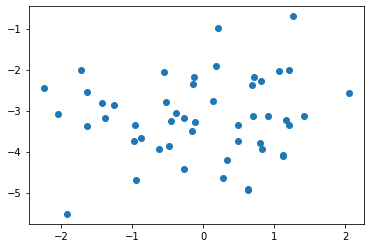

In [226]:
b = np.random.randn(N, M)
x = np.transpose(b)[0]
y = np.transpose(b)[1]
y = y - np.max(y) - 0.7
plt.scatter(x, y)
b = [x, y]

We generate random datapoints for class 1 and make the value of y greater than 0 for all datapoints

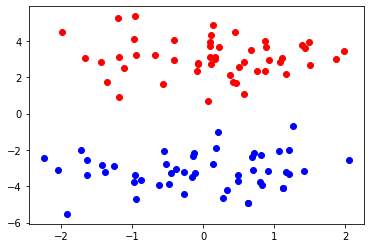

In [227]:
plt.scatter(a[0], a[1],c='r')
plt.scatter(b[0], b[1],c='b')
plt.show()

Datapoints belonging to class A is plotted in red and class B is plotted in blue. As seen from the figure, all the datapoints in class A lies above X axis (y=0) and datapoints in class B lies below X axis

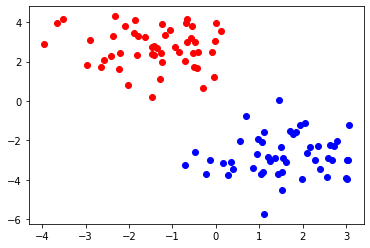

In [228]:
a = np.matmul(R, a)
plt.scatter(a[0], a[1], c='r')
b = np.matmul(R, b)
plt.scatter(b[0], b[1], c='b')
plt.show()

The datapoints are rotated at 30 degrees

[[1.17790616]
 [0.03325905]]


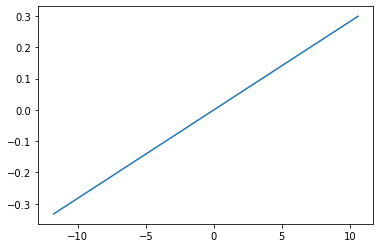

In [229]:
W = np.random.randn(2, 1)
print(W)
plt.plot(np.arange(-10, 10)*W[0][0], np.arange(-10, 10)*W[1][0])

The weights are genereated randomly. <br>
Note: We don't use bias hence the line always passes through origin. But in the general implementation we have bias term

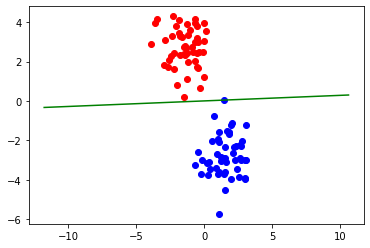

In [230]:
plt.plot(np.arange(-10, 10)*W[0][0], np.arange(-10, 10)*W[1][0], c='g')
plt.scatter(a[0], a[1], c='r')
plt.scatter(b[0], b[1], c='b')

In [231]:
x = [[], []]
print(x[1])
for i in range(N):
  x[0].append(a[0][i])
  x[1].append(a[1][i])
for i in range(N):
  x[0].append(b[0][i])
  x[1].append(b[1][i])
x = np.array(x)
print(x.shape)
x = np.transpose(x)

[]
(2, 100)


In [232]:
lr = 0.1
for i in range(100):
  n = np.random.randint(2*N)
  if((n < N and np.matmul(np.transpose(W), x[n])[0] < 0)):
    print(n)
    W = W + lr * np.transpose([x[n]] )
  if((n >= N and np.matmul(np.transpose(W), x[n])[0] > 0)):
    W = W - lr * np.transpose([x[n]] )
    print(n)
    # print(np.matmul(np.transpose(W), x[n])[0])
    W = W + lr * np.transpose([x[n]] )
    # print(W.shape)
    # print(x[n])

26
6
28
95
32
84


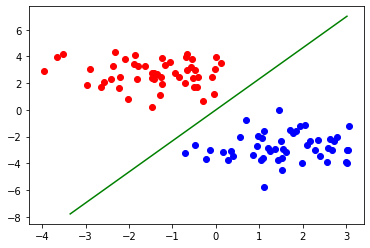

In [233]:
plt.plot(np.arange(-10, 10)*W[0][0], np.arange(-10, 10)*W[1][0], c='g')
plt.scatter(a[0], a[1], c='r')
plt.scatter(b[0], b[1], c='b')

After many iterations, we obtain solution that divides both the classes

In [234]:
np.matmul(np.transpose(W), x[1])

array([0.76393042])